# Cloze Test analysis
## From typo corrected file minimal cleanup


In [2]:
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(pastecs))
df=read.csv("testIsWordRevCorrDelforEEG.csv",header=T,strip.white=TRUE)
head(df)

,subj_id,Completion,compLower,sentID,NatNess,Diff,RT,index,determiner,noun,isDet,isWord,hasComment.,AdditCom,translation,isImportant,sentenceRisk,askForCheck,Unnamed..13
1,R_BKctGx9a1Hi7w4h,de thee,de thee,1,4,6,0.831,NA,de,thee,TRUE,TRUE,0,,,NA,NA,NA,
2,R_u2ffULg0uVmoetj,de koffie,de koffie,1,5,5,1.748,NA,de,koffie,TRUE,TRUE,0,,,NA,NA,NA,
3,R_2vf9l3GOwanVBOH,de thee,de thee,1,5,5,0.579,NA,de,thee,TRUE,TRUE,0,,,NA,NA,NA,
4,R_OqjAwL4brYESqul,de thee,de thee,1,5,6,2.621,NA,de,thee,TRUE,TRUE,0,,,NA,NA,NA,
5,R_1LG8FwYsk4Xgq61,de koffie,de koffie,1,5,6,2.426,NA,de,koffie,TRUE,TRUE,0,,,NA,NA,NA,
6,R_2wQZuV97sKRkDfp,de koffie,de koffie,1,5,6,1.304,NA,de,koffie,TRUE,TRUE,0,,,NA,NA,NA,


In [2]:
nComp=df %>% group_by(sentID) %>% summarise(nComp=length(unique(subj_id))) #merge & derive accurate percentages. On last step
head(nComp)

,sentID,nComp
1,1,52
2,2,51
3,3,52
4,4,50
5,5,52
6,6,52


In [3]:
clozeCounts=df %>% group_by(sentID,compLower) %>% summarise(popularity = length(unique(subj_id))) %>% arrange(desc(popularity)) -> test
clozeCounts=merge(clozeCounts,nComp,by='sentID')
#clozeCounts['percent']=sapply(clozeCounts$popularity, function(x) (x/clozeCounts$nComp)*100)

percentFun <- function(a,b)
{
  return((a/b)*100)
}
clozeCounts['percent']=mapply(percentFun, clozeCounts$popularity,clozeCounts$nComp)
clozeCounts['above70']=sapply(clozeCounts$percent, function(x) if (x>=70) {1} else 0)
head(clozeCounts,50)

,sentID,compLower,popularity,nComp,percent,above70
1,1,de koffie,28,52,53.84615,0
2,1,de thee,22,52,42.30769,0
3,1,de koster,1,52,1.923077,0
4,1,gi,1,52,1.923077,0
5,2,een boek,20,51,39.21569,0
6,2,het boek,7,51,13.72549,0
7,2,de brochure,4,51,7.843137,0
8,2,de informatie,3,51,5.882353,0
9,2,een artikel,2,51,3.921569,0
10,2,het artikel,2,51,3.921569,0


In [4]:
mostPop=clozeCounts %>% group_by(sentID) %>% filter(popularity == max(popularity))
#mostPop['above70']=sapply(mostPop$percent, function(x) if (x>=70) {1} else 0)
suppressMessages(library(pastecs))
stat.desc(mostPop$above70)
head(mostPop)

nbr.val     nbr.null       nbr.na          min          max        range 
141.00000000  34.00000000   0.00000000   0.00000000   1.00000000   1.00000000 
         sum       median         mean      SE.mean CI.mean.0.95          var 
107.00000000   1.00000000   0.75886525   0.03615332   0.07147706   0.18429585 
     std.dev     coef.var 
  0.42929692   0.56570903

,sentID,compLower,popularity,nComp,percent,above70
1,1,de koffie,28,52,53.84615,0
2,2,een boek,20,51,39.21569,0
3,3,de chocolade,21,52,40.38462,0
4,4,de fiets,48,50,96,1
5,5,de schat,50,52,96.15385,1
6,6,het zwembad,52,52,100,1


In [5]:
above70onlyTemp=subset(mostPop, above70==1)
stat.desc(above70onlyTemp$percent)

nbr.val     nbr.null       nbr.na          min          max        range 
 107.0000000    0.0000000    0.0000000   70.5882353  100.0000000   29.4117647 
         sum       median         mean      SE.mean CI.mean.0.95          var 
9289.1926667   87.7551020   86.8148847    0.9016679    1.7876442   86.9915264 
     std.dev     coef.var 
   9.3269248    0.1074346

## CleanUp & Frequencies & Merges
### Housekeeping

In [6]:
library(reshape2)
mostPop=transform(mostPop, comp=colsplit(compLower, pattern = " ", names = c('det', 'noun')))
mostPop$comp.det=as.factor(mostPop$comp.det)
head(mostPop)

,sentID,compLower,popularity,nComp,percent,above70,comp.det,comp.noun
1,1,de koffie,28,52,53.84615,0,de,koffie
2,2,een boek,20,51,39.21569,0,een,boek
3,3,de chocolade,21,52,40.38462,0,de,chocolade
4,4,de fiets,48,50,96,1,de,fiets
5,5,de schat,50,52,96.15385,1,de,schat
6,6,het zwembad,52,52,100,1,het,zwembad


In [7]:
summary(mostPop[which(mostPop$above70==1),]$comp.det)

de een het 
 65   0  42

In [8]:
corpus=read.csv('SUBTLEX-NL_csv.csv')
head(corpus)

,Word,FREQcount,CDcount,FREQlow,CDlow,FREQlemma,SUBTLEXWF,Lg10WF,SUBTLEXCD,Lg10CD
1,ik,1744062,8054,778704,3125,1744527,39883.03,6.2416,99.8017,3.9061
2,je,1600888,8060,1315051,6535,1600923,36608.94,6.2044,99.8761,3.9064
3,het,1068396,8066,780771,5578,1913811,24431.97,6.0287,99.9504,3.9067
4,de,1061177,8070,903872,6512,1063827,24266.89,6.0258,100,3.9069
5,dat,965424,8063,715570,6107,965431,22077.22,5.9847,99.9133,3.9066
6,is,947568,8067,891894,7636,1891610,21668.89,5.9766,99.9628,3.9068


In [9]:
corpusSub=corpus[,c("Word","Lg10WF")]
mostPopAndFreq=merge(mostPop, corpusSub, by.x='comp.noun',by.y='Word',all.x=T,sort=F)
mostPopAndFreq=mostPopAndFreq[,c('sentID','compLower','popularity','nComp','percent','above70','comp.det','comp.noun','Lg10WF')]
head(mostPopAndFreq)

,sentID,compLower,popularity,nComp,percent,above70,comp.det,comp.noun,Lg10WF
1,1,de koffie,28,52,53.84615,0,de,koffie,3.7657
2,2,een boek,20,51,39.21569,0,een,boek,3.8196
3,3,de chocolade,21,52,40.38462,0,de,chocolade,2.786
4,4,de fiets,48,50,96,1,de,fiets,2.9786
5,5,de schat,50,52,96.15385,1,de,schat,4.0625
6,6,het zwembad,52,52,100,1,het,zwembad,3.006


### Adding sentences

In [10]:
origSent=read.csv('../clozeTestQualtricsSentences.csv',header=T)
mostPopFreqSents=merge(origSent, mostPopAndFreq, by='sentID', all.y=T, sort=F)

In [11]:
head(mostPopFreqSents,2)

,sentID,SentenceContext,sentenceClosure,compLower,popularity,nComp,percent,above70,comp.det,comp.noun,Lg10WF
1,1,Voor veel Nederlanders is een koekje bij,heilig.,de koffie,28,52,53.84615,0,de,koffie,3.7657
2,2,Jasper wilde gelijk piloot worden na het lezen van,over vliegtuigen.,een boek,20,51,39.21569,0,een,boek,3.8196


### Saving Intermediary Output

In [12]:
write.csv(mostPopFreqSents,'./output/mostPopFreqSents.csv',row.names=F)

### Frequency Distribution Analaysis

In [1]:
mostPopFreqSents=read.csv('./output/mostPopFreqSents.csv',header=T)
mostPopAndFreq70=subset(mostPopFreqSents, above70==1)
head(mostPopAndFreq70)
summary(mostPopAndFreq70)

,sentID,SentenceContext,sentenceClosure,compLower,popularity,nComp,percent,above70,comp.det,comp.noun,Lg10WF
4,4,Veel Nederlanders gaan bij mooi weer naar hun werk op,maar pakken de auto als het regent.,de fiets,48,50,96,1,de,fiets,2.9786
5,5,De piraat gebruikte een geheime kaart bij zijn zoektocht naar,op het eiland.,de schat,50,52,96.15385,1,de,schat,4.0625
6,6,In de zomer neem ik om af te koelen graag een duik bij de buren in,in hun achtertuin.,het zwembad,52,52,100,1,het,zwembad,3.006
7,7,"De fluitketel op het fornuis floot, dus rende mijn moeder snel naar de keuken om het hete water voor",in te schenken.,de thee,48,50,96,1,de,thee,3.4103
8,8,Vergeet bij het bereiden van de kip niet het voorverwarmen van,zodat je niet hoeft te wachten.,de oven,50,52,96.15385,1,de,oven,2.6375
9,9,Met Kerst kijk ik vaak naar de kerstboom met daaronder,in mooie verpakkingen.,de cadeautjes,37,52,71.15385,1,de,cadeautjes,2.5132


     sentID      
 Min.   :  4.00  
 1st Qu.: 35.00  
 Median : 70.00  
 Mean   : 71.91  
 3rd Qu.:107.50  
 Max.   :142.00  
                 
                                                                                 SentenceContext
 Adriaan haalde zijn nieuwe medicijnen op bij                                            :  1   
 Agnes was op vakantie erg bruin geworden van                                            :  1   
 Al om half acht 's ochtends stond mijn moeder voor de hele familie eieren te bakken voor:  1   
 Alle ingredi<ef>nten voor het gerecht had Lisanne in de keuken op                       :  1   
 Alle net uitgebrachte boeken zijn vaak al binnen twee weken te leen bij                 :  1   
 Als ik op vakantie naar een ver land ga, reis ik altijd met                             :  1   
 (Other)                                                                                 :101   
                                                               sentenceClosure
 

nbr.val     nbr.null       nbr.na          min          max        range 
 107.0000000    0.0000000    0.0000000    1.2788000    4.8115000    3.5327000 
         sum       median         mean      SE.mean CI.mean.0.95          var 
 309.5267000    2.9479000    2.8927729    0.0730265    0.1447821    0.5706170 
     std.dev     coef.var 
   0.7553920    0.2611308

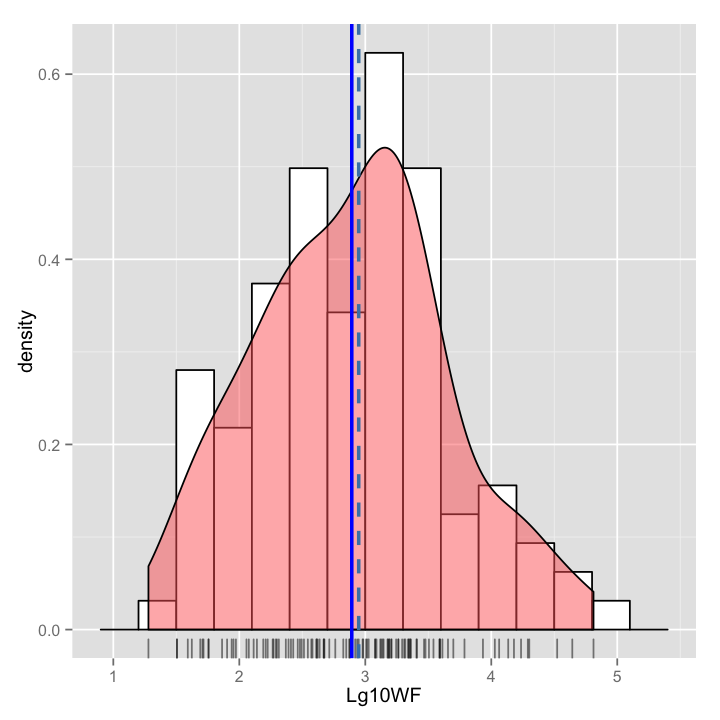

In [7]:
options(repr.plot.width = 6)
options(repr.plot.height = 6)
stat.desc(mostPopAndFreq70$Lg10WF)
ggplot(mostPopAndFreq70, aes(x=Lg10WF)) + 
    geom_histogram(aes(y=..density..),binwidth=.3,colour="black", fill="white") +
    geom_density(alpha=.5, fill="#FF6666")+
    geom_rug(alpha=.5)+# Overlay with transparent density plot
    geom_vline(aes(xintercept=mean(Lg10WF, na.rm=T)),color="blue", linetype="solid", size=1)+
    geom_vline(aes(xintercept=median(Lg10WF, na.rm=T)),color="steelblue", linetype="dashed", size=1)

## Save Files

In [25]:
write.csv(clozeCounts,'./output/clozePossibilitiesForEEG.csv',row.names=F)
write.csv(mostPop,'./output/mostPopForEEG.csv',row.names=F)

# SUMMARISING ALL OTHER VARIABLES
Todo:
- for each sentence get summary across participants of **NatNess**, **Diff**, **RT**
- merge with final sentences (the output with the mostpop and sentence reconstructed and frequency reconstructed).

In [18]:
allVars=read.csv('testIsWordRevCorrDelforEEG.csv')

In [21]:
otherVars=allVars %>% group_by(sentID) %>% summarise(natNess=mean(NatNess), RT=mean(RT), Diff=mean(Diff))


In [22]:
head(otherVars)


,sentID,natNess,RT,Diff
1,1,4.692308,6.075269,5.673077
2,2,4.470588,7.154824,5.45098
3,3,4.423077,7.014846,5.557692
4,4,4.38,13.5676,5.8
5,5,4.730769,6.871192,5.846154
6,6,4.326923,7.045538,5.673077


In [23]:
mostPop=read.csv('./output/mostPopFreqSents.csv')
#head(mostPop)
mostPopAndOtherVar=merge(mostPop,otherVars,by='sentID',all.x=T)


In [26]:
head(mostPopAndOtherVar)
above70onlyTemp=subset(mostPopAndOtherVar, above70==1)
stat.desc(above70onlyTemp$percent)

,sentID,SentenceContext,sentenceClosure,compLower,popularity,nComp,percent,above70,comp.det,comp.noun,Lg10WF,natNess,RT,Diff
1,1,Voor veel Nederlanders is een koekje bij,heilig.,de koffie,28,52,53.84615,0,de,koffie,3.7657,4.692308,6.075269,5.673077
2,2,Jasper wilde gelijk piloot worden na het lezen van,over vliegtuigen.,een boek,20,51,39.21569,0,een,boek,3.8196,4.470588,7.154824,5.45098
3,3,Om de brownie te maken smelt Max als eerste,voor hij de eieren toevoegt.,de chocolade,21,52,40.38462,0,de,chocolade,2.786,4.423077,7.014846,5.557692
4,4,Veel Nederlanders gaan bij mooi weer naar hun werk op,maar pakken de auto als het regent.,de fiets,48,50,96,1,de,fiets,2.9786,4.38,13.5676,5.8
5,5,De piraat gebruikte een geheime kaart bij zijn zoektocht naar,op het eiland.,de schat,50,52,96.15385,1,de,schat,4.0625,4.730769,6.871192,5.846154
6,6,In de zomer neem ik om af te koelen graag een duik bij de buren in,in hun achtertuin.,het zwembad,52,52,100,1,het,zwembad,3.006,4.326923,7.045538,5.673077


nbr.val     nbr.null       nbr.na          min          max        range 
 107.0000000    0.0000000    0.0000000   70.5882353  100.0000000   29.4117647 
         sum       median         mean      SE.mean CI.mean.0.95          var 
9289.1926667   87.7551020   86.8148847    0.9016679    1.7876442   86.9915264 
     std.dev     coef.var 
   9.3269248    0.1074346

In [25]:
write.csv(mostPopAndOtherVar,'./output/mostPopAndOtherVar.csv',row.names=F)

## SCRAP CODE

nbr.val     nbr.null       nbr.na          min          max        range 
  141.000000     0.000000     0.000000    30.612245   100.000000    69.387755 
         sum       median         mean      SE.mean CI.mean.0.95          var 
10968.319235    82.692308    77.789498     1.576021     3.115878   350.221721 
     std.dev     coef.var 
   18.714212     0.240575

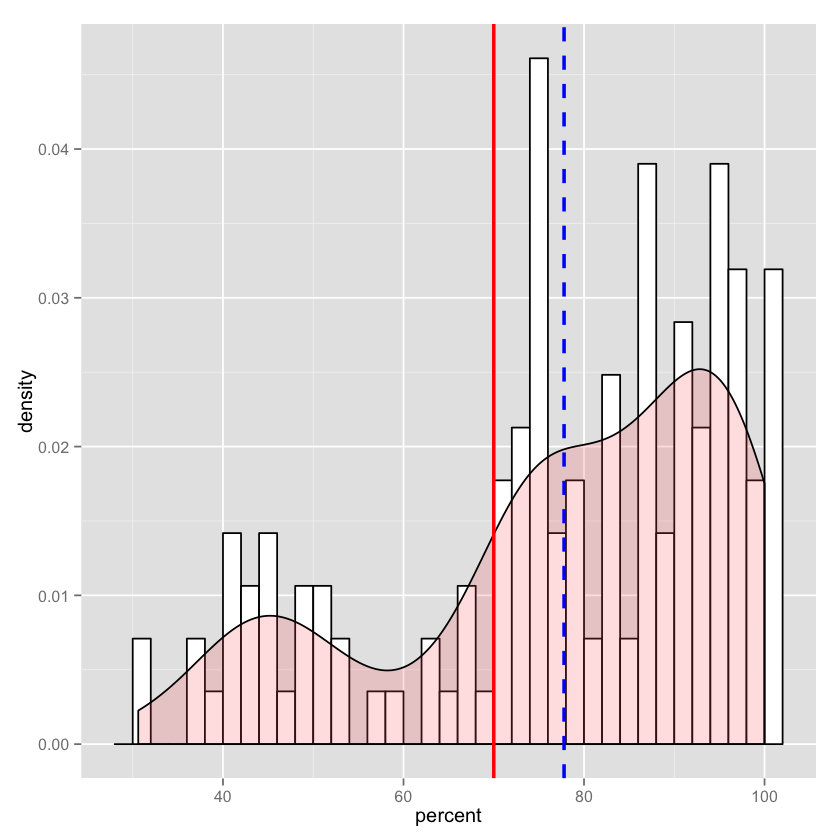

In [7]:
stat.desc(mostPop$percent)
ggplot(mostPop, aes(x=percent)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=2,
                   colour="black", fill="white") +
    geom_density(alpha=.2, fill="#FF6666")+  # Overlay with transparent density plot
    geom_vline(aes(xintercept=mean(percent, na.rm=T)),color="blue", linetype="dashed", size=1)+
    geom_vline(aes(xintercept=70),color="red", linetype="solid", size=1)

nbr.val     nbr.null       nbr.na          min          max        range 
 107.0000000    0.0000000    0.0000000   70.5882353  100.0000000   29.4117647 
         sum       median         mean      SE.mean CI.mean.0.95          var 
9289.1926667   87.7551020   86.8148847    0.9016679    1.7876442   86.9915264 
     std.dev     coef.var 
   9.3269248    0.1074346

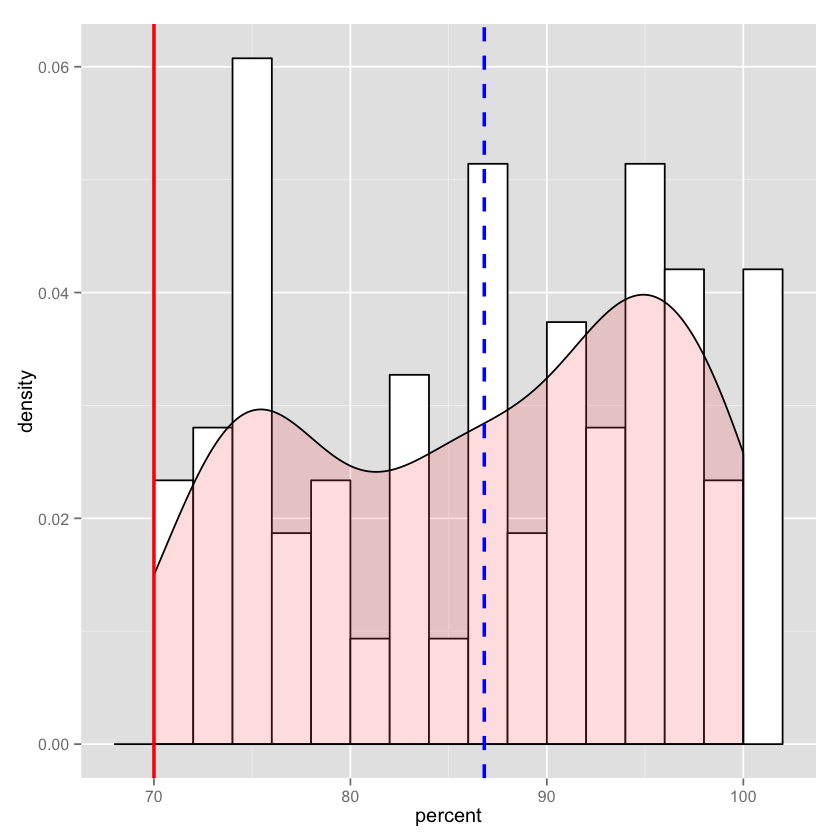

In [43]:
#tmp=subset(mostPop,above70==1)
stat.desc(tmp$percent)
ggplot(tmp, aes(x=percent)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=2,
                   colour="black", fill="white") +
    geom_density(alpha=.2, fill="#FF6666")+  # Overlay with transparent density plot
    geom_vline(aes(xintercept=mean(percent, na.rm=T)),color="blue", linetype="dashed", size=1)+
    geom_vline(aes(xintercept=70),color="red", linetype="solid", size=1)